In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_excel('Data.xlsx', sheet_name='ABG')

In [28]:
df.head()

,Name,Diagnosis,pH,pCO2,pO2,sO2,Hct,tHb,Na,K,...,iMg,Glu,Lact,O2Hb,CoHb,MetHb,HHb,tBil,HbF,tCo2
0,Abuzar,NaN,7.410,30.1,55.6,NaN,27,NaN,136.7,4.25,...,0.56,71,2.4,NaN,NaN,NaN,NaN,NaN,NaN,20.1
1,Ajmat,Pneumo-thorax e-ICD miska,7.223,22.4,43.8,NaN,22,NaN,119.8,1.79,...,0.15,56,1.2,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2,Ajmat,Pneumo-thorax e-ICD miska,7.205,31.9,97.8,100.0,35,10.7,137.2,3.04,...,0.75,119,1.8,98.5,0.8,0.3,0.4,4.1,0.10,13.7
3,Ajmat,Pneumo-thorax e-ICD miska,7.206,35.0,152.8,NaN,27,NaN,134.8,2.74,...,0.60,94,1.9,NaN,NaN,NaN,NaN,NaN,NaN,15.1
4,Aksha,Acute encephalitis meningitis,7.385,29.7,52.7,84.0,21,6.5,133.4,4.01,...,0.38,134,1.0,83.2,0.4,0.4,16.1,2.9,0.05,18.9


In [29]:
Y = df['Diagnosis']

In [30]:
df.drop(columns=['Name', 'Diagnosis'], inplace=True)

In [31]:
for column in df.columns:
    # Check if the column contains 'Stability'
    if df[column].dtype == 'object' and 'Stability' in df[column].values:
        # Convert non-numeric values to NaN (including 'Stability')
        df[column] = pd.to_numeric(df[column], errors='coerce')
        # Calculate the average of the column, excluding NaN values
        column_mean = df[column].mean()
        # Replace NaN values (originally 'Stability') with the column average
        df[column].fillna(column_mean, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\3250218434.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(column_mean, inplace=True)


In [32]:
string_columns = df.select_dtypes(include='object').columns
print(string_columns)

Index([], dtype='object')


In [33]:
# Find columns with any empty (NaN) values
columns_with_missing_values = df.columns[df.isnull().any()]

# Print columns with missing values
print(columns_with_missing_values)

Index(['sO2', 'tHb', 'O2Hb', 'CoHb', 'MetHb', 'HHb', 'tBil', 'HbF'], dtype='object')


In [34]:
column_means = df.mean()
df = df.fillna(column_means)

In [35]:
# Find columns with any empty (NaN) values
columns_with_missing_values = df.columns[df.isnull().any()]

# Print columns with missing values
print(columns_with_missing_values)

Index([], dtype='object')


In [36]:
# Summary statistics
print(df.describe())

              pH       pCO2         pO2         sO2        Hct        tHb  \
count  35.000000  35.000000   35.000000   35.000000  35.000000  35.000000   
mean    7.274057  23.717143  116.897143   91.555556  26.058824   8.800000   
std     0.177310   7.755131   62.413651    3.030348   5.994807   1.512497   
min     6.671000   8.600000   38.000000   82.000000  15.000000   6.000000   
25%     7.192000  18.450000   56.850000   91.555556  22.000000   8.800000   
50%     7.317000  22.400000  108.300000   91.555556  25.000000   8.800000   
75%     7.405500  28.800000  178.900000   91.555556  27.500000   8.800000   
max     7.503000  40.700000  216.600000  100.000000  43.000000  14.200000   

               Na          K        iCa        iMg         Glu       Lact  \
count   35.000000  35.000000  35.000000  35.000000   35.000000  35.000000   
mean   134.880000   3.345714   0.711143   0.385714   83.129032   2.742857   
std     10.378224   0.745344   0.269518   0.166138   48.616592   3.437619  

In [37]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

             pH      pCO2       pO2       sO2       Hct       tHb        Na  \
pH     1.000000  0.242709  0.183732 -0.154333  0.116542 -0.022505  0.286167   
pCO2   0.242709  1.000000 -0.354552 -0.139754  0.506324  0.177730 -0.213402   
pO2    0.183732 -0.354552  1.000000  0.257301 -0.451517 -0.142964  0.560334   
sO2   -0.154333 -0.139754  0.257301  1.000000  0.057745  0.172832  0.151742   
Hct    0.116542  0.506324 -0.451517  0.057745  1.000000  0.753969 -0.111786   
tHb   -0.022505  0.177730 -0.142964  0.172832  0.753969  1.000000 -0.088496   
Na     0.286167 -0.213402  0.560334  0.151742 -0.111786 -0.088496  1.000000   
K     -0.021020 -0.008403  0.151180  0.136527  0.158483  0.213597  0.381325   
iCa    0.382390  0.251957  0.047749 -0.166773  0.372436  0.208082  0.588514   
iMg    0.201323  0.244567  0.022821  0.149036  0.376277  0.158949  0.483085   
Glu   -0.288354  0.444060 -0.259384 -0.099689  0.082052  0.006776 -0.284922   
Lact  -0.578207 -0.126968 -0.033700 -0.029865  0.067

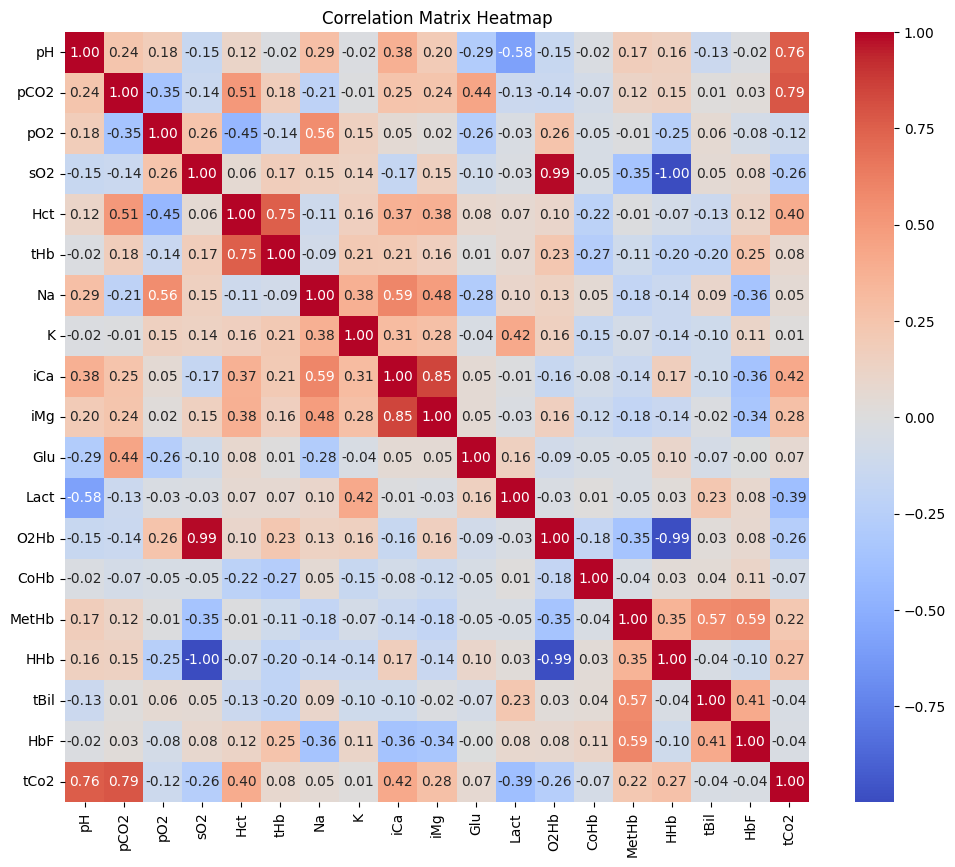

In [38]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

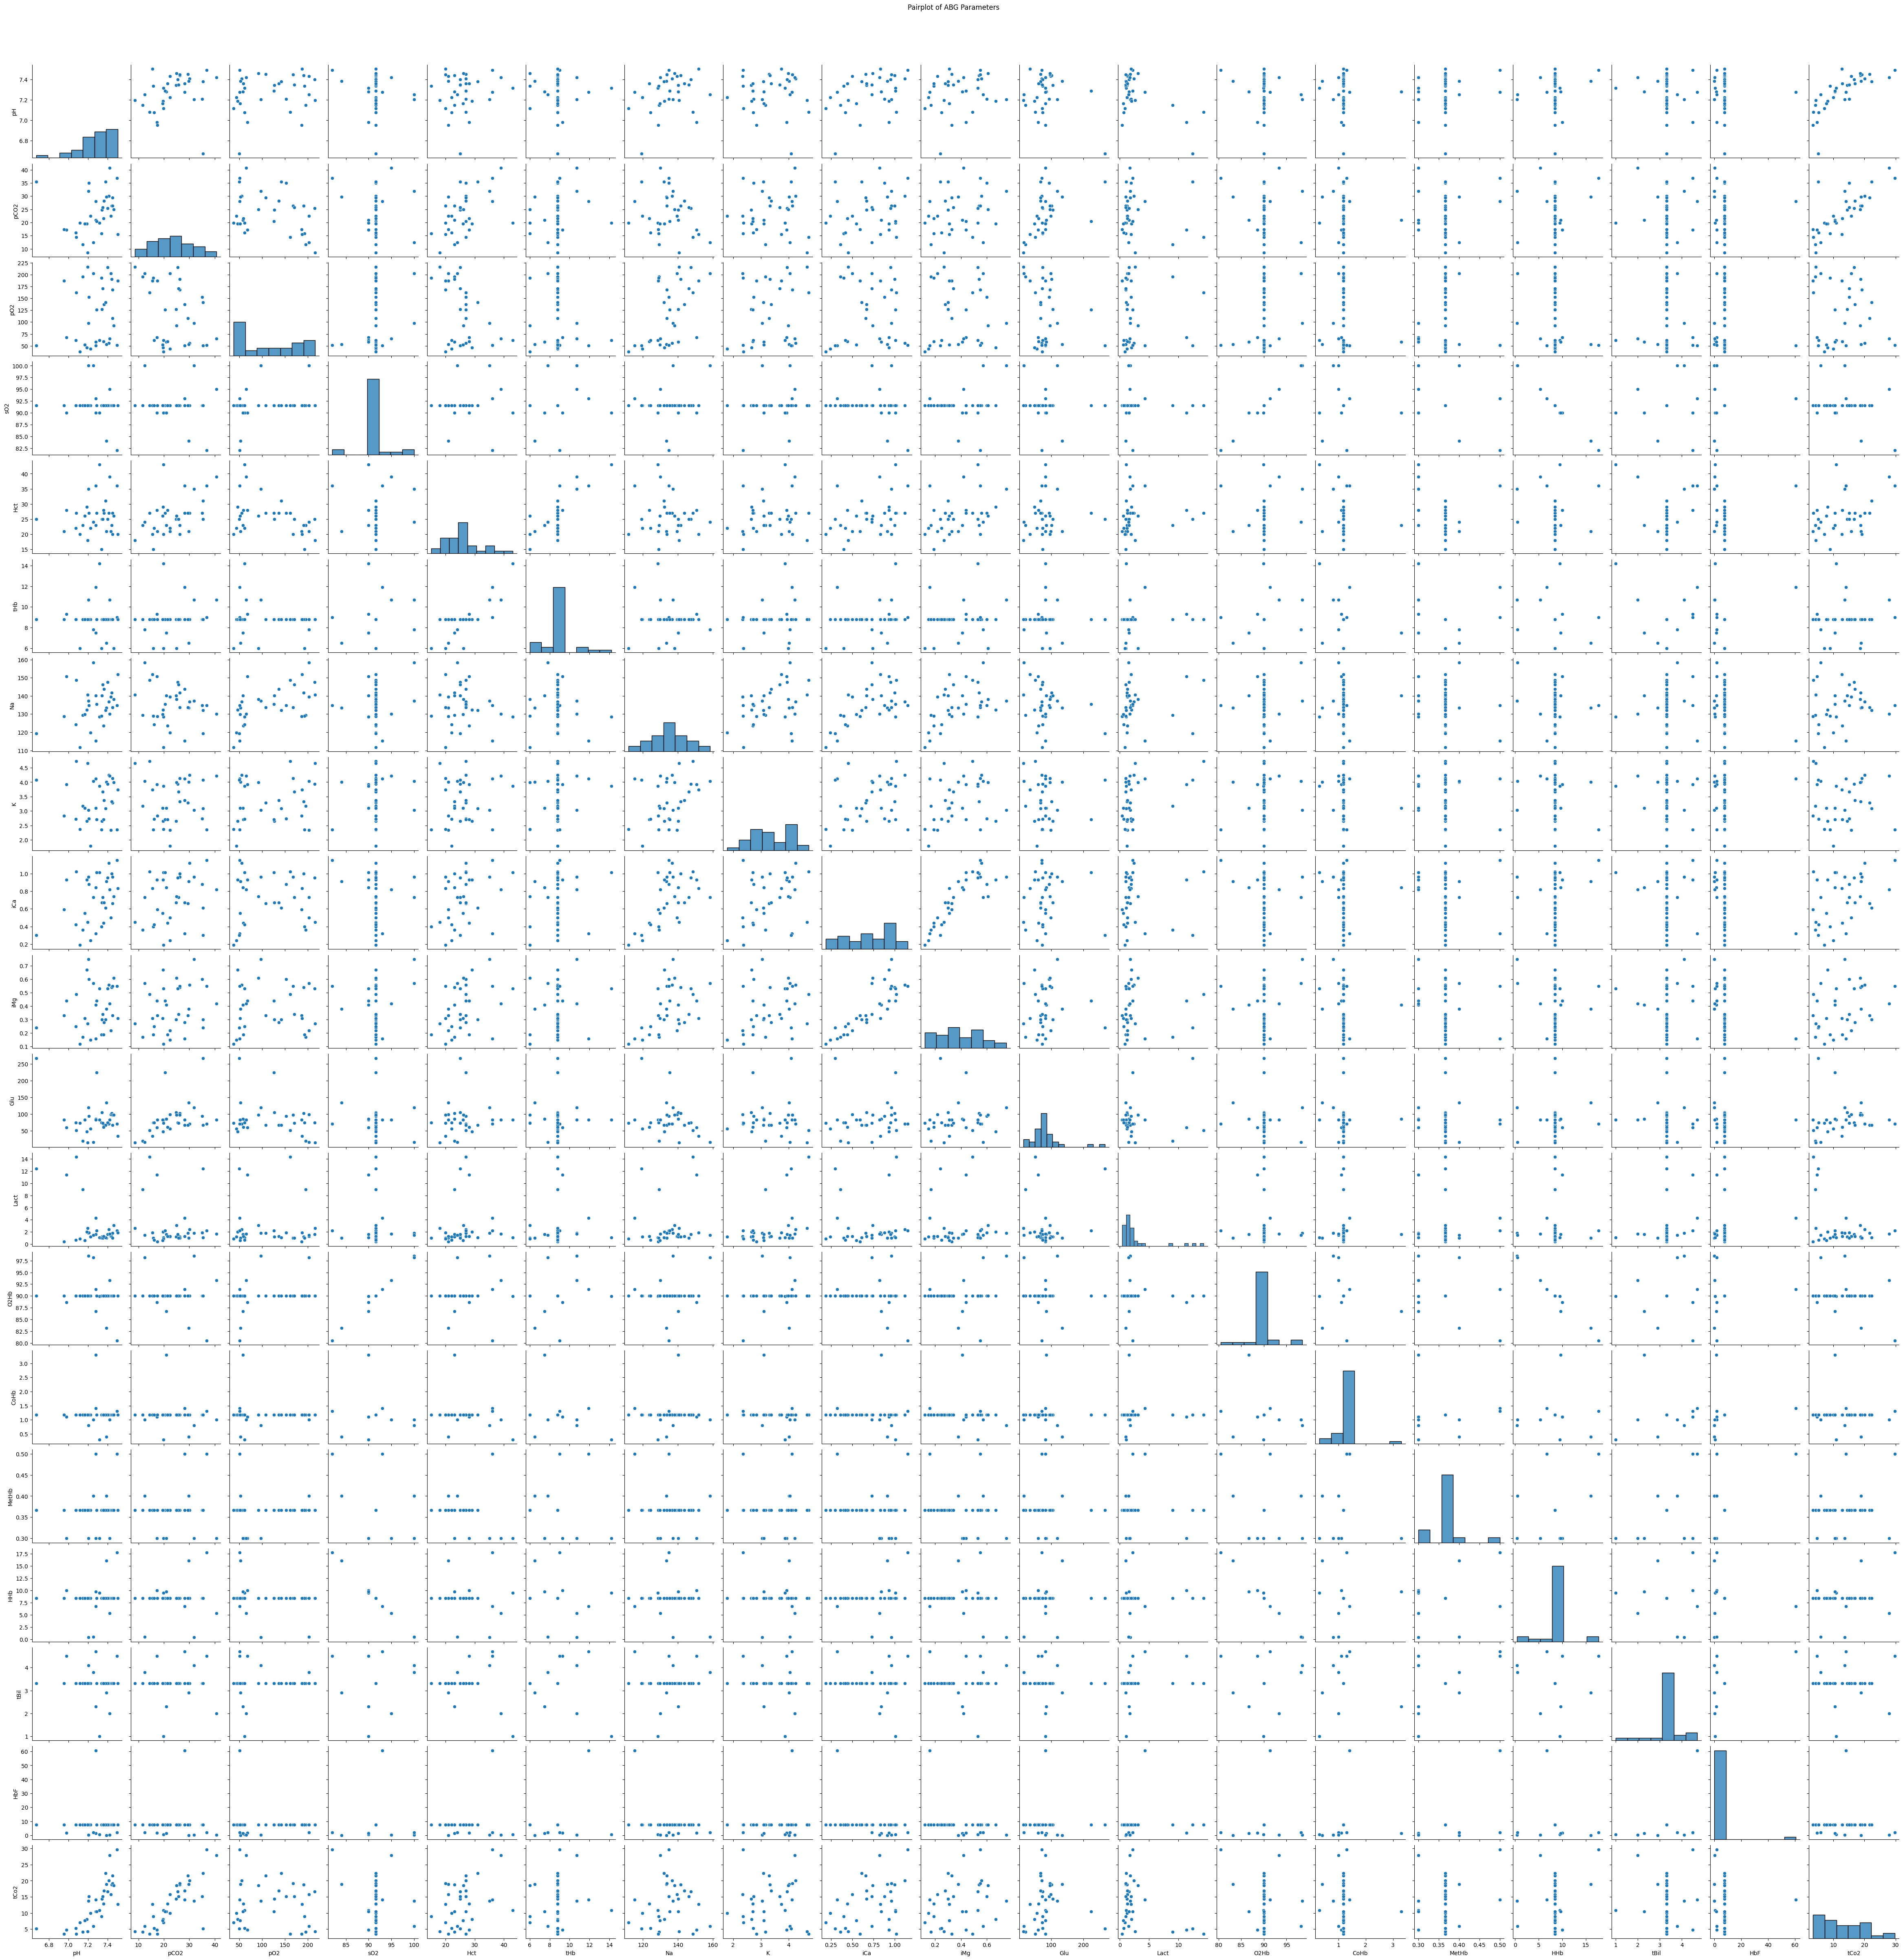

In [39]:
# Pairplot for visualizing relationships between features
sns.pairplot(df)
plt.suptitle('Pairplot of ABG Parameters', y=1.02)
plt.show()

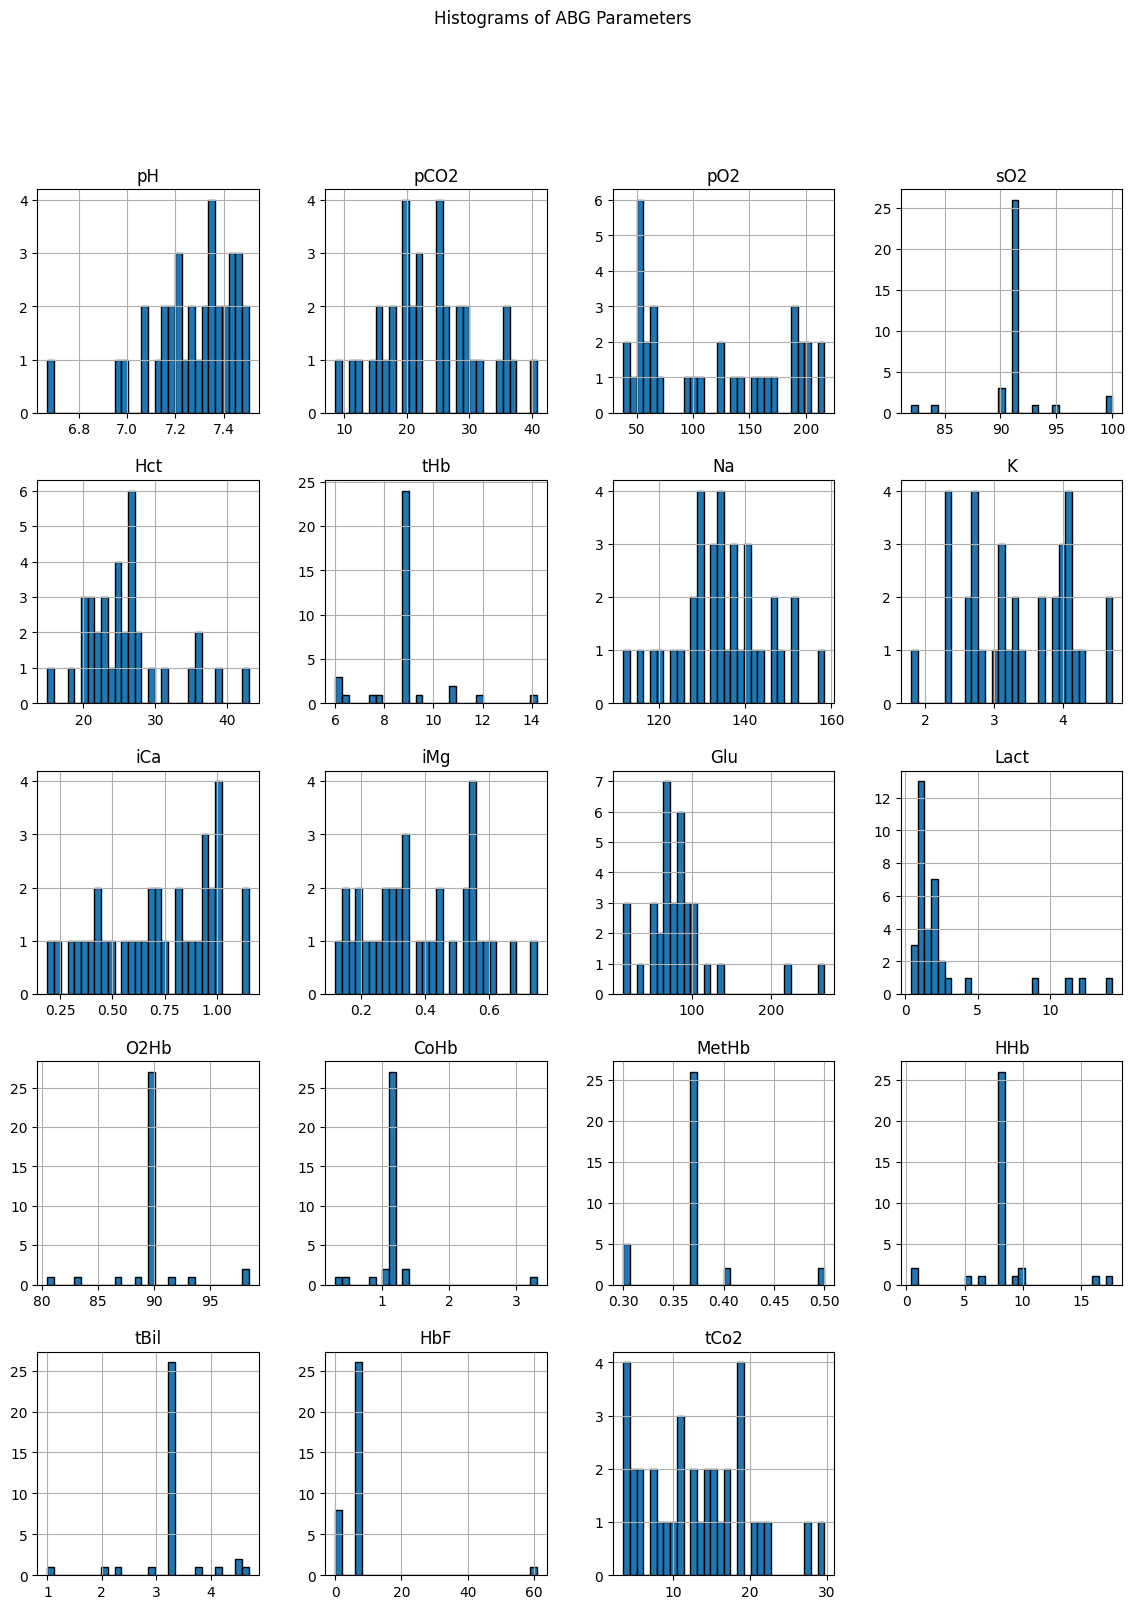

In [40]:
# Histograms for each parameter
df.hist(figsize=(14, 18), bins=30, edgecolor='k')
plt.suptitle('Histograms of ABG Parameters')
plt.show()

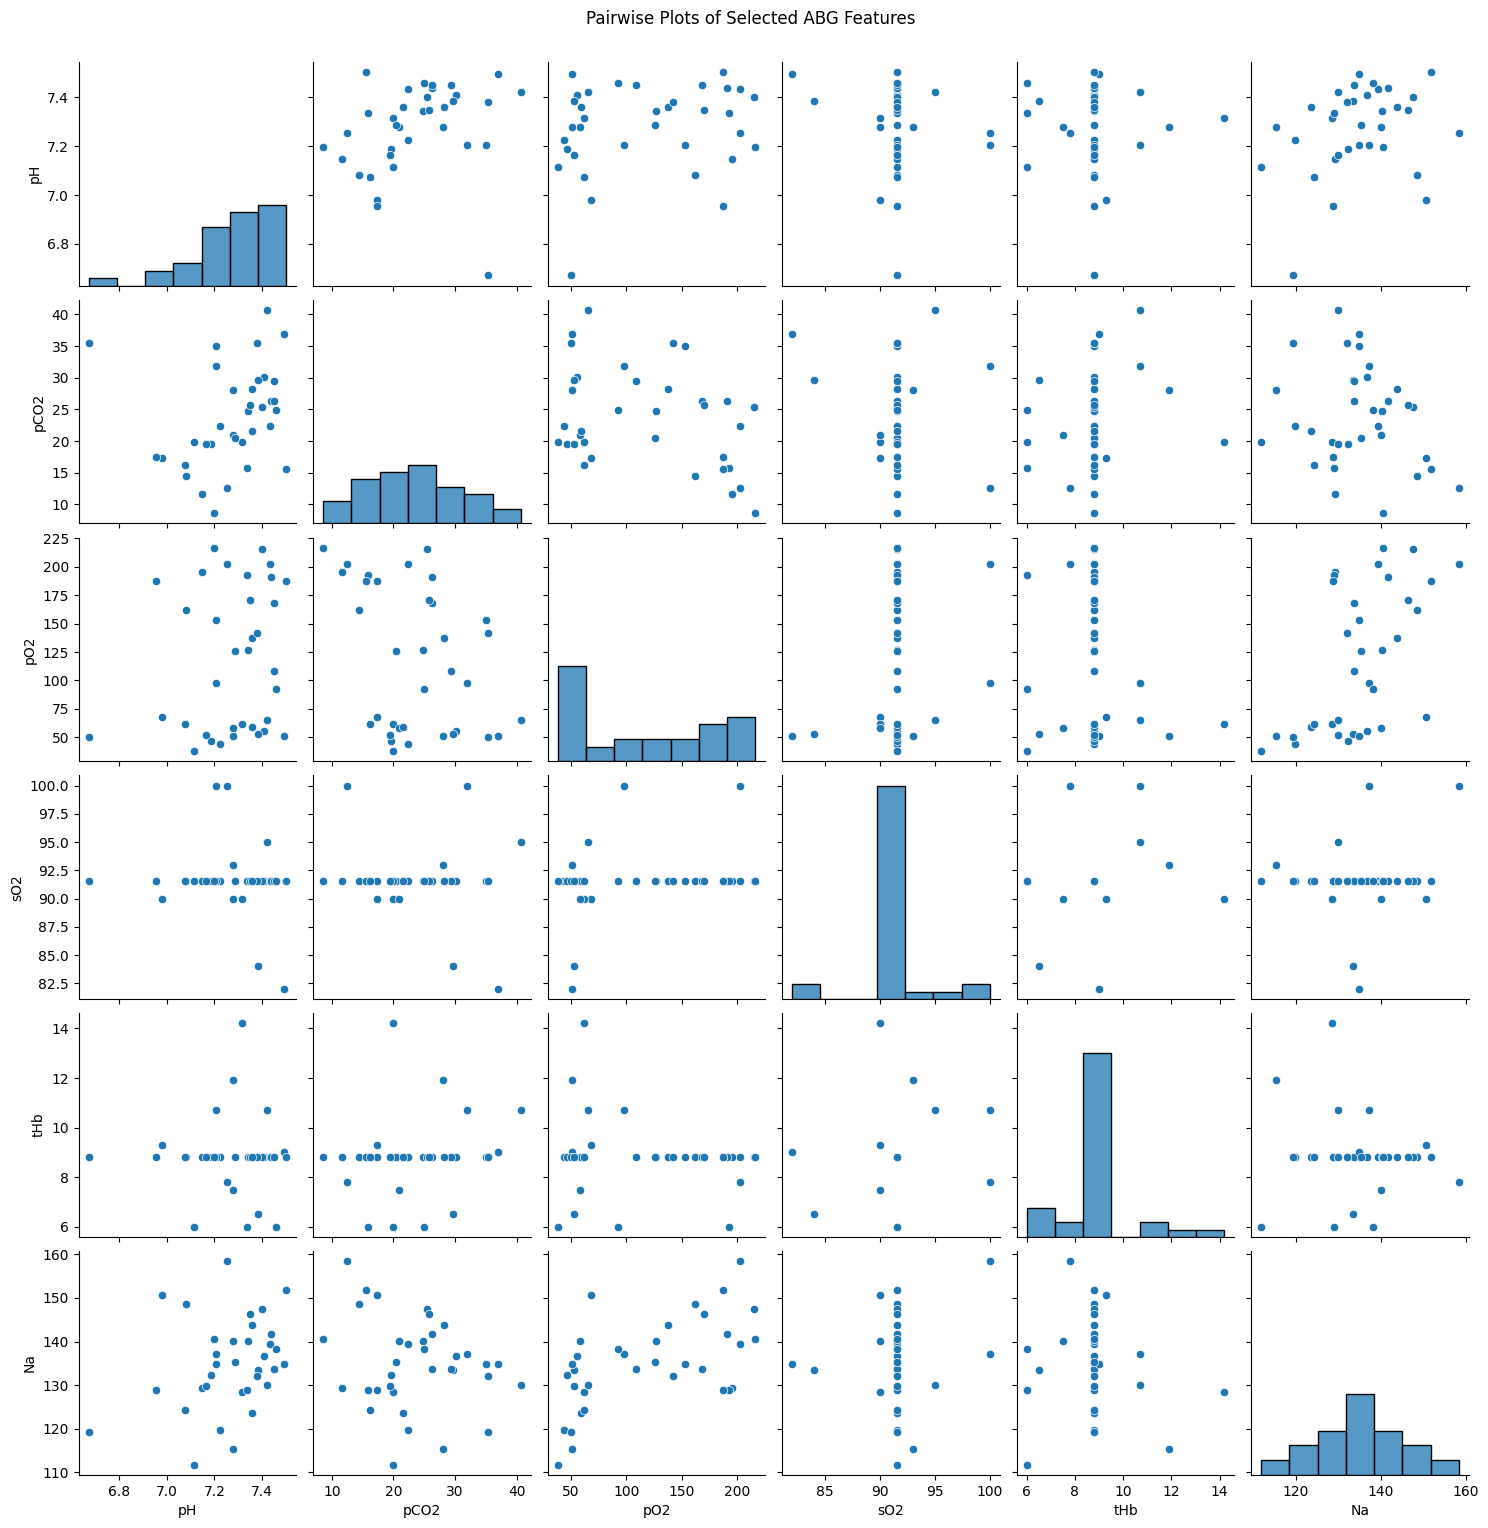

In [41]:
# Pairwise plots for selected features
selected_features = ['pH', 'pCO2', 'pO2', 'sO2', 'tHb', 'Na']
sns.pairplot(df[selected_features])
plt.suptitle('Pairwise Plots of Selected ABG Features', y=1.02)
plt.show()

In [42]:
new_df = df.copy()
new_df['Diagnosis'] = Y
new_df.head()

,pH,pCO2,pO2,sO2,Hct,tHb,Na,K,iCa,iMg,Glu,Lact,O2Hb,CoHb,MetHb,HHb,tBil,HbF,tCo2,Diagnosis
0,7.410,30.1,55.6,91.555556,27.0,8.8,136.7,4.25,1.12,0.56,71.0,2.4,90.033333,1.177778,0.366667,8.433333,3.311111,7.627778,20.1,NaN
1,7.223,22.4,43.8,91.555556,22.0,8.8,119.8,1.79,0.24,0.15,56.0,1.2,90.033333,1.177778,0.366667,8.433333,3.311111,7.627778,10.0,Pneumo-thorax e-ICD miska
2,7.205,31.9,97.8,100.000000,35.0,10.7,137.2,3.04,0.96,0.75,119.0,1.8,98.500000,0.800000,0.300000,0.400000,4.100000,0.100000,13.7,Pneumo-thorax e-ICD miska
3,7.206,35.0,152.8,91.555556,27.0,8.8,134.8,2.74,0.88,0.60,94.0,1.9,90.033333,1.177778,0.366667,8.433333,3.311111,7.627778,15.1,Pneumo-thorax e-ICD miska
4,7.385,29.7,52.7,84.000000,21.0,6.5,133.4,4.01,0.91,0.38,134.0,1.0,83.200000,0.400000,0.400000,16.100000,2.900000,0.050000,18.9,Acute encephalitis meningitis


In [43]:
new_df = new_df.dropna()

In [44]:
new_df.head()

,pH,pCO2,pO2,sO2,Hct,tHb,Na,K,iCa,iMg,Glu,Lact,O2Hb,CoHb,MetHb,HHb,tBil,HbF,tCo2,Diagnosis
1,7.223,22.4,43.8,91.555556,22.0,8.8,119.8,1.79,0.24,0.15,56.0,1.2,90.033333,1.177778,0.366667,8.433333,3.311111,7.627778,10.0,Pneumo-thorax e-ICD miska
2,7.205,31.9,97.8,100.000000,35.0,10.7,137.2,3.04,0.96,0.75,119.0,1.8,98.500000,0.800000,0.300000,0.400000,4.100000,0.100000,13.7,Pneumo-thorax e-ICD miska
3,7.206,35.0,152.8,91.555556,27.0,8.8,134.8,2.74,0.88,0.60,94.0,1.9,90.033333,1.177778,0.366667,8.433333,3.311111,7.627778,15.1,Pneumo-thorax e-ICD miska
4,7.385,29.7,52.7,84.000000,21.0,6.5,133.4,4.01,0.91,0.38,134.0,1.0,83.200000,0.400000,0.400000,16.100000,2.900000,0.050000,18.9,Acute encephalitis meningitis
5,6.981,17.3,68.0,90.000000,28.0,9.3,150.7,3.92,0.93,0.44,60.0,11.4,88.600000,1.100000,0.300000,10.000000,4.500000,1.800000,4.8,Acute encephalitis meningitis


C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\2906633835.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Diagnosis', y=col, data=new_df, ci='sd')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\2906633835.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Diagnosis', y=col, data=new_df, ci='sd')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\2906633835.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Diagnosis', y=col, data=new_df, ci='sd')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\2906633835.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Diagnosis', y=col, data=new_df, ci='sd')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9896\2906633835.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` 

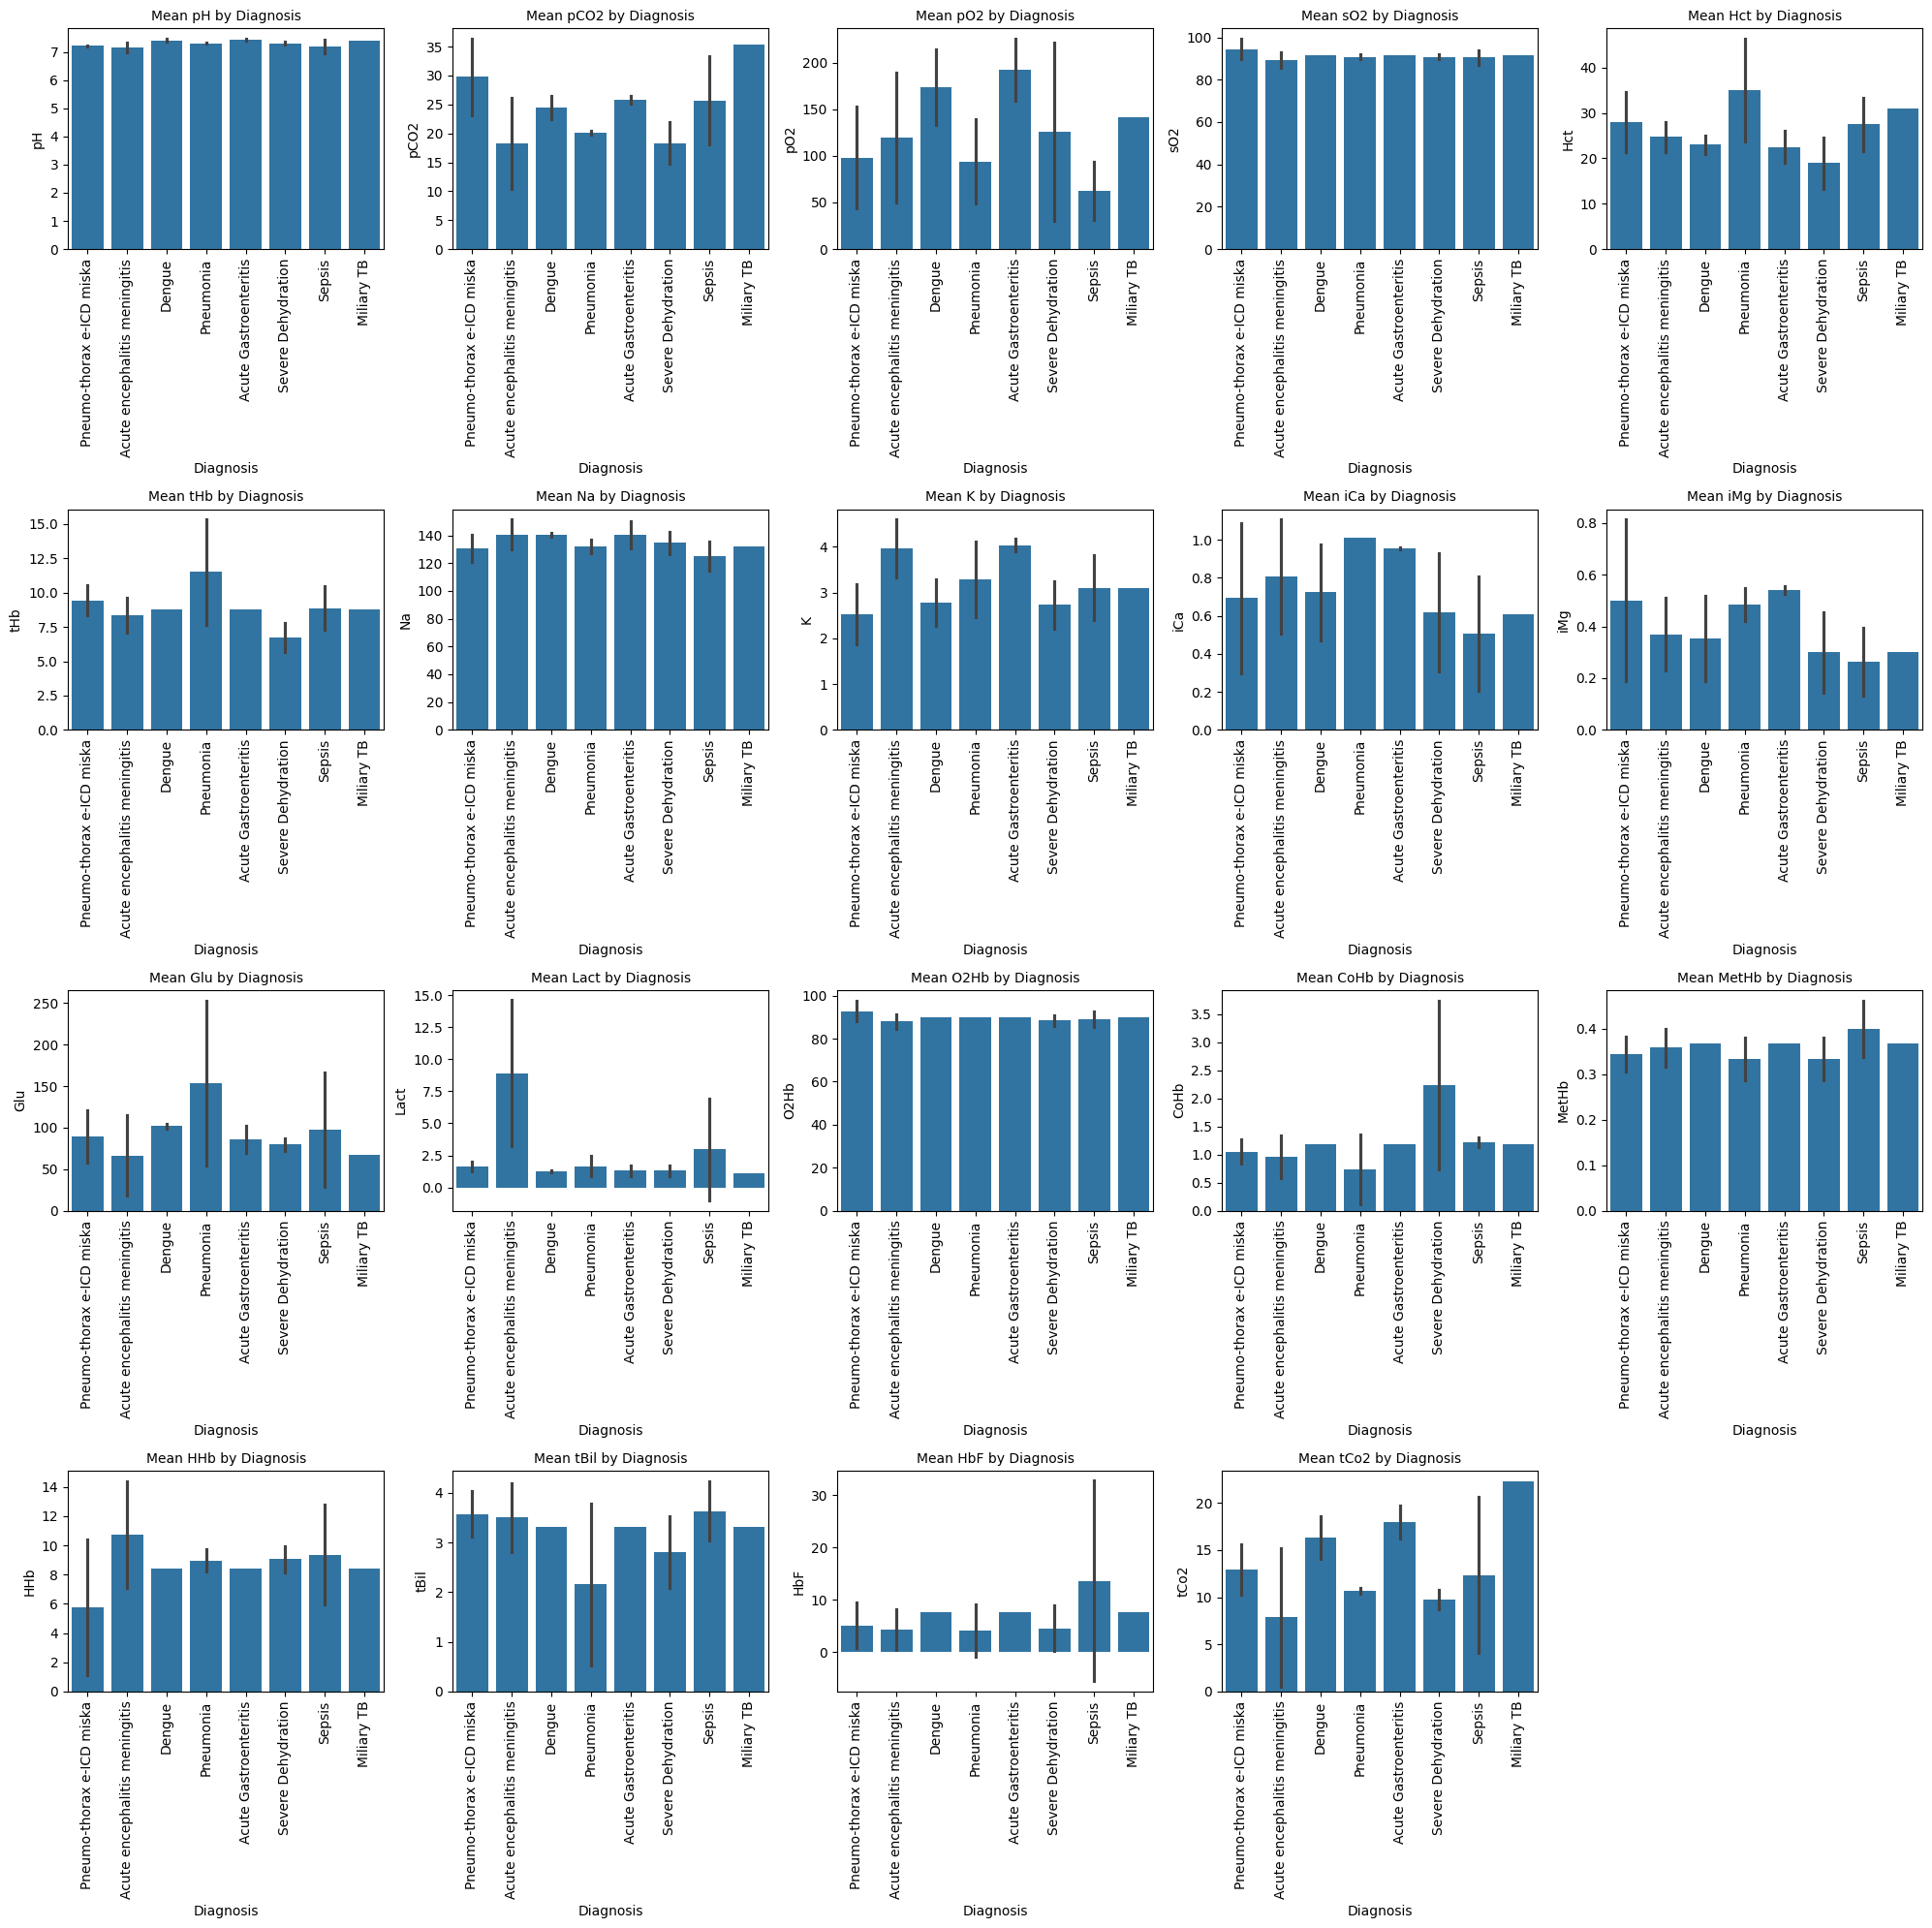

In [49]:
# Bar plots for mean values of parameters grouped by diagnoses
plt.figure(figsize=(20,20))
for i, col in enumerate(new_df.columns[:-1], 1):  # Skip the 'Diagnosis' column for plotting
    plt.subplot(4, 5, i)
    sns.barplot(x='Diagnosis', y=col, data=new_df, ci='sd')
    plt.title(f'Mean {col} by Diagnosis', fontsize=10)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()